# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
    * Методом nesterov momentum
    * Методом rmsprop
* Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

# Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее

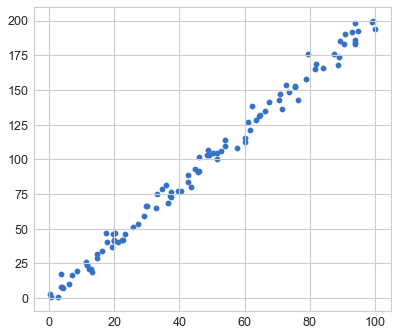

In [2]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

### Методом nesterov momentum

In [3]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 50
LEARNING_RATE = 0.0001

momentum = 0.9
velocity_param_0 = 0
velocity_param_1 = 0

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)

    predictions_ahead = ( params[0] - momentum * velocity_param_0 ) + ( params[1] - momentum * velocity_param_1 ) * X
    
    velocity_param_0 =  momentum * velocity_param_0 + LEARNING_RATE * np.sum(predictions_ahead - Y) / len(predictions_ahead)
    velocity_param_1 =  momentum * velocity_param_1 + LEARNING_RATE * np.sum((predictions_ahead - Y) * X) / len(predictions_ahead)
    
    params[0] -= velocity_param_0
    params[1] -= velocity_param_1 

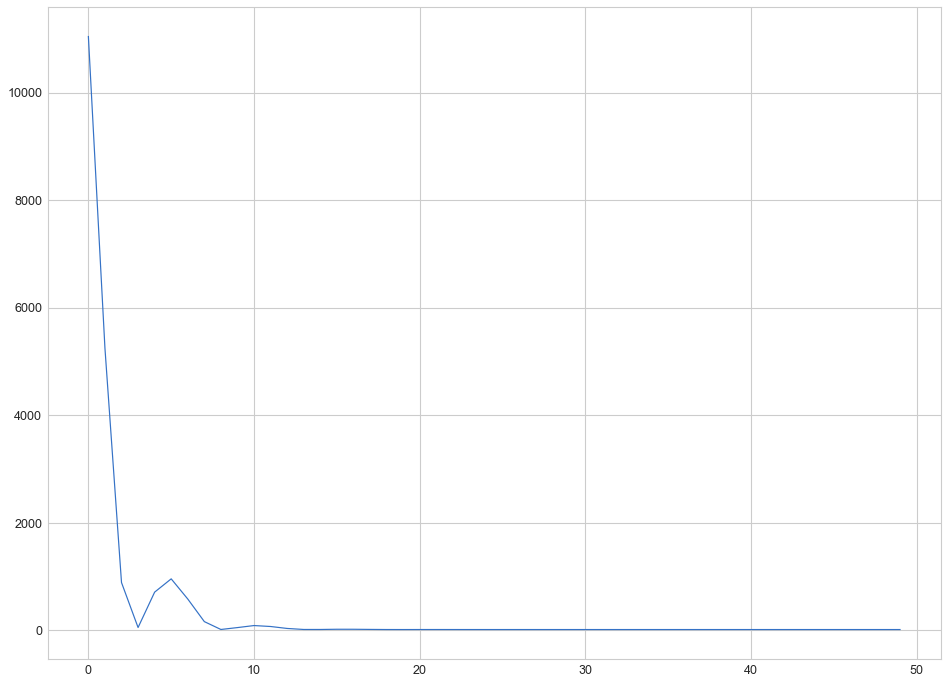

In [4]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

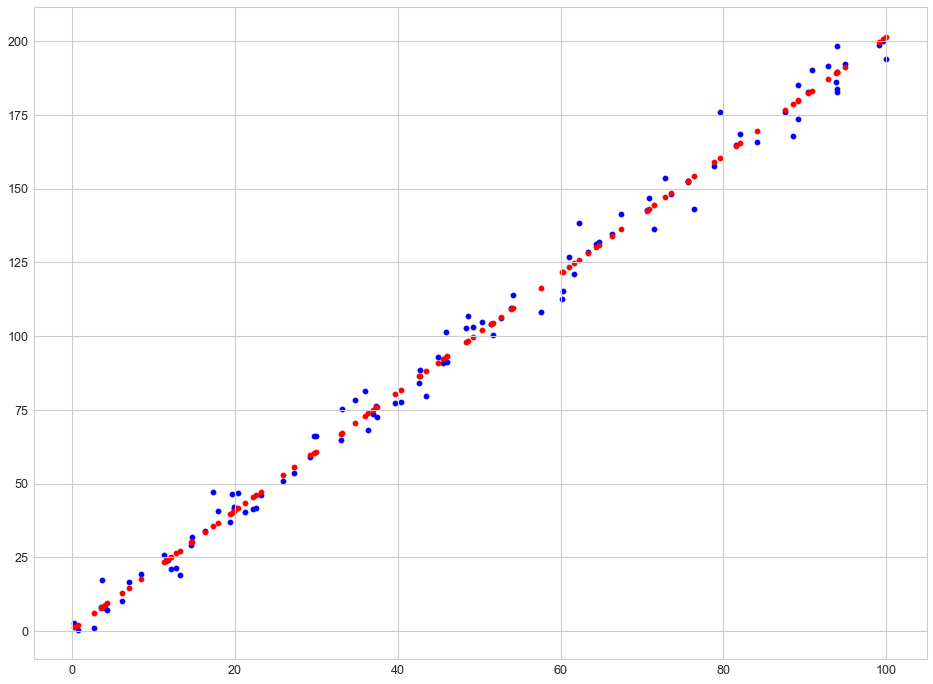

In [5]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[49], color='red')
plt.show()

In [6]:
params

array([0.74095297, 2.00866881])

### Методом rmsprop

In [7]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 50
LEARNING_RATE = 0.2

gamma = 0.9
cache_param_0 = 0
cache_param_1 = 0
eps = 1e-8

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    cache_param_0 =  gamma * cache_param_0 + (1 - gamma) * (np.square(np.sum(predictions - Y) / len(predictions)))
    cache_param_1 =  gamma * cache_param_1 + (1 - gamma) * (np.square(np.sum((predictions - Y) * X) / len(predictions)))
    
    grad_param_0 =  np.sum(predictions - Y) / len(predictions)
    grad_param_1 =  np.sum((predictions - Y) * X) / len(predictions)
    
    params[0] -= LEARNING_RATE * grad_param_0 / (np.sqrt(cache_param_0) + eps)
    params[1] -= LEARNING_RATE * grad_param_1 / (np.sqrt(cache_param_1) + eps)

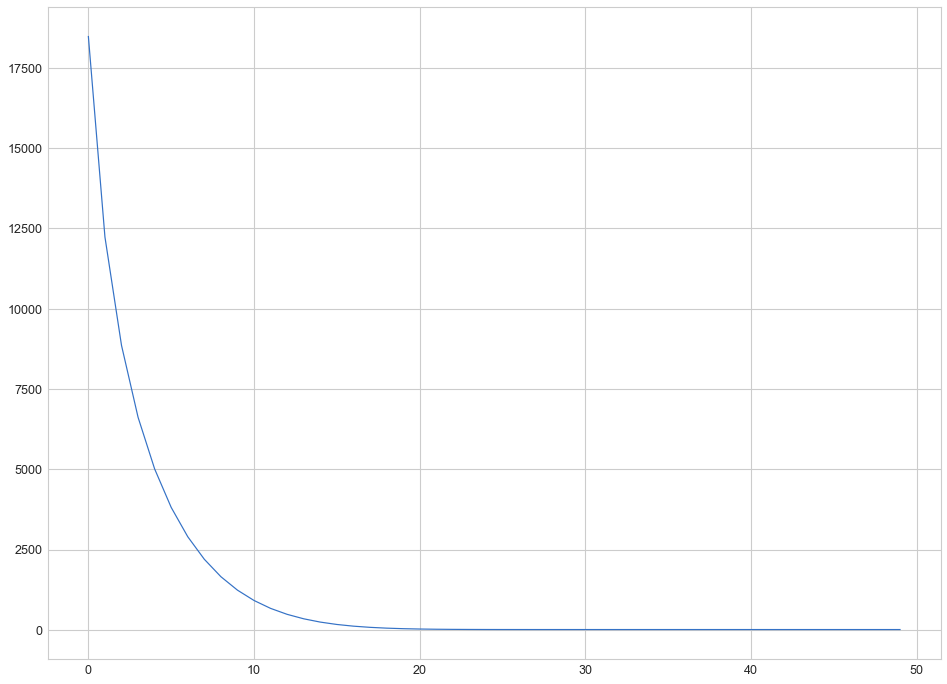

In [8]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

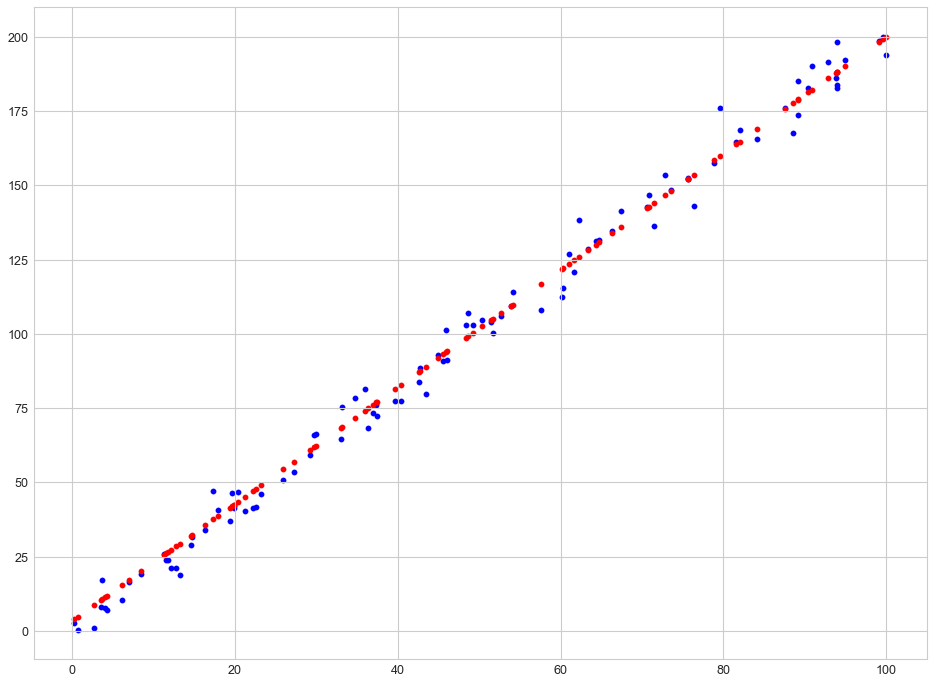

In [9]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[EPOCHS - 1], color='red')
plt.show()

In [10]:
params

array([3.4669971 , 1.96692839])

# Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [11]:
from sklearn import datasets

In [12]:
iris = datasets.load_iris()

In [13]:
df = pd.DataFrame(np.concatenate((iris.data, iris.target[:, None]), axis=1))

In [14]:
data = df[df[4] != 1].iloc[:,:4].values
target = df[df[4] != 1].apply(lambda x: x / 2).iloc[:,4].values

In [15]:
data = np.c_[ np.ones(data.shape[0]), df[df[4] != 1].iloc[:,:4].values]

### Методом nesterov momentum

In [16]:
EPOCHS = 50
LEARNING_RATE = 0.01

momentum = 0.9
velocity_param = np.zeros_like(data.shape[1])

costs = []
params = []
preds = []

In [17]:
m = data.shape[0]
params = np.ones(data.shape[1])

for _ in range(EPOCHS):
    predictions = 1/(1+np.exp(-1*(np.dot(data, params))))
    preds.append(predictions)
    
    cost = -(1 / m) * np.sum(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
    costs.append(cost)
    
    predictions_ahead = 1/(1+np.exp(-1*(np.dot(data, params - momentum * velocity_param))))
    
    velocity_param = momentum * velocity_param + LEARNING_RATE * (1 / m) * np.dot(data.T, predictions_ahead - target)
    
    params -= velocity_param

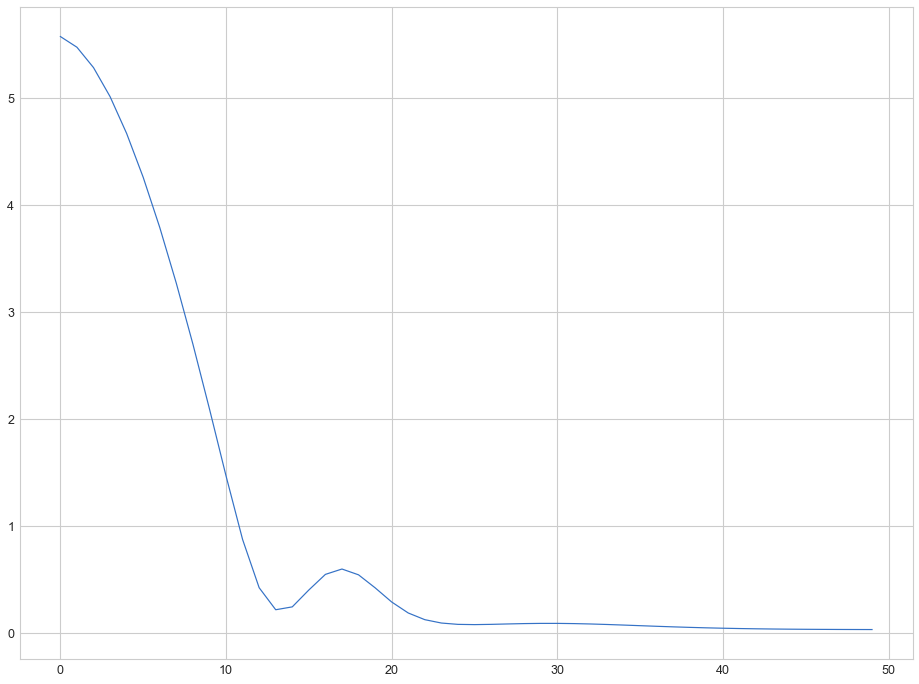

In [18]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [19]:
params

array([ 0.55139061, -0.82711411, -0.64247452,  1.37609547,  1.33249436])

### Методом rmsprop

In [20]:
EPOCHS = 50
LEARNING_RATE = 0.01

gamma = 0.9
cache_param = np.zeros_like(data.shape[1])
eps = 1e-8

costs = []
params = []
preds = []

m = data.shape[0]
params = np.ones(data.shape[1])

In [21]:
for _ in range(EPOCHS):
    predictions = 1/(1+np.exp(-1*(np.dot(data, params))))
    preds.append(predictions)
    
    cost = -(1 / m) * np.sum(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
    costs.append(cost)
    
    cache_param =  gamma * cache_param + (1 - gamma) * (np.square(np.sum(predictions - target) / len(predictions)))
    
    grad_param = (1 / m) * np.dot(data.T, predictions - target)
    
    params -= LEARNING_RATE * grad_param / (np.sqrt(cache_param) + eps)

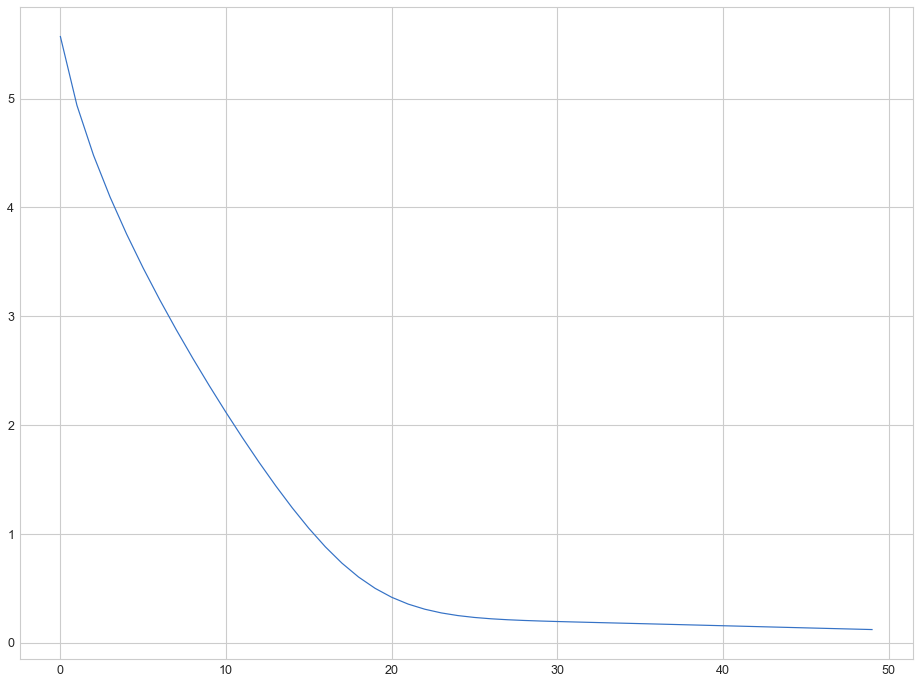

In [22]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [23]:
params

array([ 0.64548627, -0.63452598, -0.24909741,  0.82053214,  1.05701149])